In [2]:
import pandas as pd 
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os

In [5]:
pip install pymysql.connect

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pymysql.connect (from versions: none)
ERROR: No matching distribution found for pymysql.connect


In [4]:
pip install upgrade pip  

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pymysql

db = pymysql.connect(
    host='localhost',
    user='root',
    password='Aman@786#',
    database='aman'
)
mycursor = db.cursor()
print("Connected successfully!")


Connected successfully!


In [3]:
import pandas as pd
import pymysql
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('order_items.csv', 'orders_items'),
    ('geolocation.csv','geolocation'),
    ('orders.csv','orders'),
    ('sellers.csv', 'sales'),
    ('products.csv', 'products'),
    ('payments.csv', 'payments')  # Added payments.csv for specific handling
]

# Connect to the MySQL database using pymysql
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='Aman@786#',
    database='aman',
    autocommit=False,  # You can control commit manually
    charset='utf8mb4',
    cursorclass=pymysql.cursors.Cursor
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/ak613/OneDrive/Desktop/commerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit after each file
    conn.commit()

# Close the connection
conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing order_items.csv
NaN values before replacement:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Processing geolocation.csv
NaN values before replacement:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered

# List all unique cities where customers are located.

In [7]:
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='Aman@786#',
    db='aman'
)
cursor = connection.cursor()


In [8]:
print(connection.open)  # should return True


True


In [11]:
query='''select distinct customer_city  from customers'''
cursor.execute(query)
data=cursor.fetchall()
data

(('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [21]:
query='''select COUNT(order_id)  from orders where year(order_purchase_timestamp)=2017 '''
cursor.execute(query)
data=cursor.fetchall()
print('total orders placed in 2017 are',data[0][0])

total orders placed in 2017 are 135303


# Find the total sales per category.

In [38]:
query='''select upper(products.product_category) as category,round(sum(payments.payment_value),2) as sales from products join orders_items on products.product_id=orders_items.product_id
join payments on payments.order_id=orders_items.order_id group by category'''
cursor.execute(query)
data=cursor.fetchall()
data
a=pd.DataFrame(data,columns=['Catagory','Sales'])
a

,Catagory,Sales
0,PERFUMERY,6080863.92
1,FURNITURE DECORATION,17162116.70
2,TELEPHONY,5842584.61
3,FASHION BAGS AND ACCESSORIES,2617899.36
4,BED TABLE BATH,20550644.05
...,...,...
69,CDS MUSIC DVDS,14393.16
70,LA CUISINE,34962.36
71,FASHION CHILDREN'S CLOTHING,9428.04
72,PC GAMER,26093.16


# Calculate the percentage of orders that were paid in installments.

In [51]:
query='''select (sum(case when payment_installments>=1 then 1 else 0 end))/count(*)*100  from payments'''
cursor.execute(query)
data=cursor.fetchall()
data

((Decimal('99.9981'),),)

# Count the number of customers from each state.

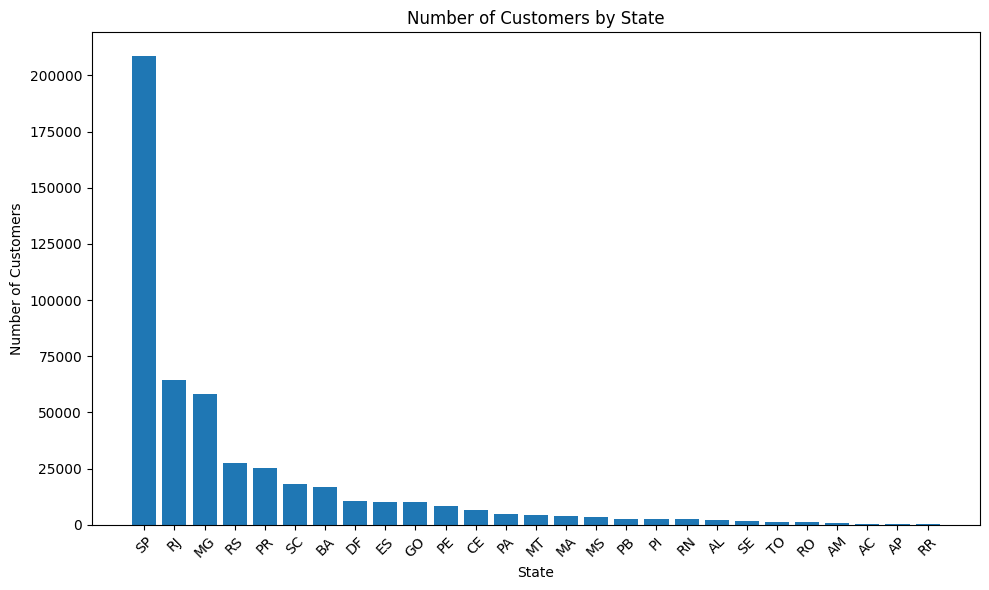

In [32]:
query = '''
SELECT customer_state, COUNT(customer_id) AS customers_count
FROM customers
GROUP BY customer_state
'''

cursor.execute(query)
data = cursor.fetchall()

# Create DataFrame
a = pd.DataFrame(data, columns=['State', 'Customers_count'])

# Sort by Customers_count in descending order
b = a.sort_values(by='Customers_count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(b['State'], b['Customers_count'])
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Calculate the number of orders per month in 2018.

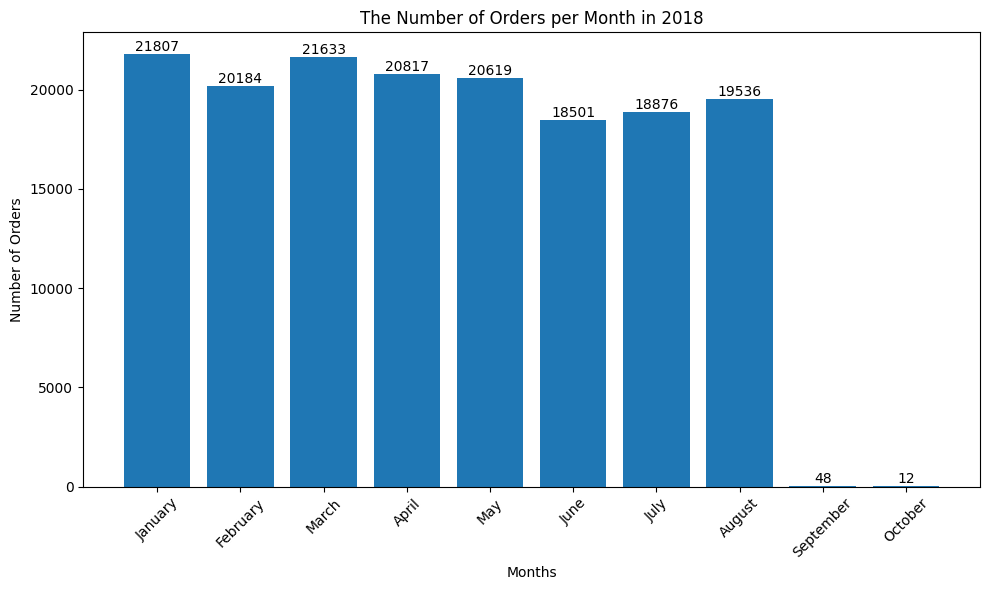

In [90]:
# Corrected SQL Query (assuming you want 2018 data)
query = '''
SELECT COUNT(order_id) AS total_orders, MONTHNAME(order_purchase_timestamp) AS month, MONTH(order_purchase_timestamp) AS month_number
FROM orders
WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY month, month_number
ORDER BY month_number;
'''
cursor.execute(query)
data = cursor.fetchall()

# Create DataFrame
a = pd.DataFrame(data, columns=['total_orders', 'months', 'month_number'])

# Plot

plt.figure(figsize=(10,6))
b=plt.bar(a['months'],a['total_orders'])
plt.bar_label(b, labels= a['total_orders'])
plt.title('The Number of Orders per Month in 2018')
plt.xlabel('Months')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Find the average number of products per order,grouped by customer city.

In [98]:
query='''with count_per_order as 
 (select orders.order_id,orders.customer_id,count(orders_items.order_id) as oc from orders join orders_items on orders.order_id=orders_items.order_id group by orders.order_id,orders.customer_id)
 
 select customers.customer_city,round(avg(count_per_order.oc),2) average_orders from customers join count_per_order on customers.customer_id=count_per_order.customer_id group by customers.customer_city order by average_orders desc '''
cursor.execute(query)
data=cursor.fetchall()
a=pd.DataFrame(data,columns=['Customer City','Average products/orders'])
a

,Customer City,Average products/orders
0,padre carvalho,63.00
1,celso ramos,58.50
2,datas,54.00
3,candido godoi,54.00
4,matias olimpio,45.00
...,...,...
4105,sao mamede,9.00
4106,sambaiba,9.00
4107,japaratuba,9.00
4108,tuiuti,9.00


# Calculate the percentage of total revenue contributed by each product category.

In [27]:
query='''WITH product_cat AS (
    SELECT 
        UPPER(p.product_category) AS product,
        ot.order_id,
        pay.payment_value
    FROM products AS p
    JOIN orders_items AS ot ON p.product_id = ot.product_id
    JOIN payments AS pay ON ot.order_id = pay.order_id
)

SELECT 
    product,
    ROUND(SUM(payment_value) * 100.0 / (SELECT SUM(payment_value) FROM payments), 2) AS percentage
FROM product_cat
GROUP BY product
ORDER BY percentage DESC;
'''
cursor.execute(query)
data=cursor.fetchall()
a=pd.DataFrame(data,columns=['products','Sales_percentage'])
a.head(10)

,products,Sales_percentage
0,BED TABLE BATH,64.19
1,HEALTH BEAUTY,62.12
2,COMPUTER ACCESSORIES,59.42
3,FURNITURE DECORATION,53.60
4,WATCHES PRESENT,53.57
5,SPORT LEISURE,52.18
6,HOUSEWARES,41.03
7,AUTOMOTIVE,31.94
8,GARDEN TOOLS,31.42
9,COOL STUFF,29.22


# Identify  the correlation between product price and the number of times a product has been purchased.

In [31]:

query='''select products.product_category as product ,count(orders_items.product_id) as sales_count,round(avg(orders_items.price),2)  as price from products
 join orders_items
 on products.product_id=orders_items.product_id group by products.product_category order by sales_count desc
'''
cursor.execute(query)
data=cursor.fetchall()
a=pd.DataFrame(data,columns=['Products','total_sales','avg_price'])
a

arr1=a['total_sales']
arr2=a['avg_price']

b=np.corrcoef([arr1,arr2])
print('the correlation is',b[0][-1])


the correlation is -0.10631514167157564


# Calculate the total revenue generated by each seller , and rank then by revenue.


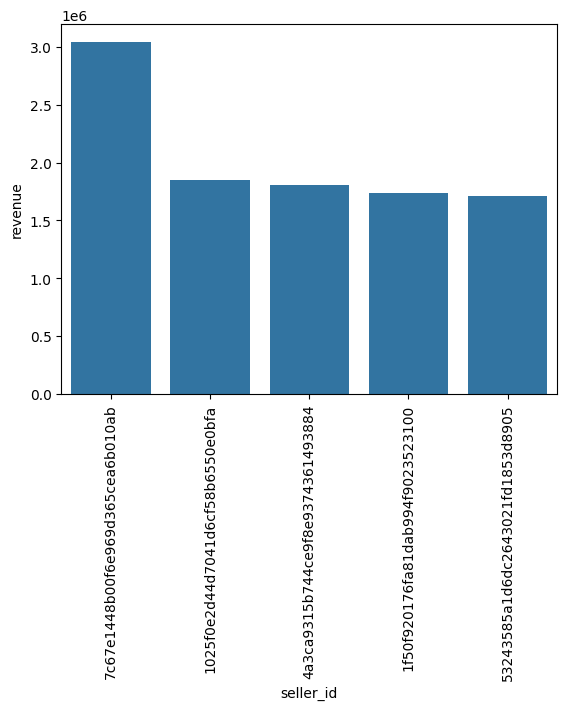

In [21]:
import seaborn as sns
query=''' select *, dense_rank() over(order by revenue desc) as rn from (select orders_items.seller_id,round(sum(payments.payment_value),2) as revenue from orders_items join payments 
 on orders_items.order_id=payments.order_id
 group by orders_items.seller_id) as a ;
'''
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=['seller_id','revenue','rank'])
df=df.head()
plt.xticks(rotation=90)
sns.barplot(x='seller_id',y='revenue',data=df)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [9]:
import pandas as pd 
query='''SELECT 
  customer_id,
  order_purchase_timestamp,
  payments,
  AVG(payments) OVER (
    PARTITION BY customer_id 
    ORDER BY order_purchase_timestamp 
    ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
  ) AS mov_avg
FROM (
  SELECT 
    o.customer_id,
    o.order_purchase_timestamp,
    p.payment_value AS payments
  FROM orders o
  JOIN payments p ON o.order_id = p.order_id
) AS a'''

cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=['customer_id','order_purchase_timestamp','payments','Moving_value'])
df.head(10)


,customer_id,order_purchase_timestamp,payments,Moving_value
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
5,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
6,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
7,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
8,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
9,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004


# Calculate the cumulative sales per month for each year.

C:\Users\ak613\AppData\Local\Temp\ipykernel_10096\355118439.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Years', y='Cumulative_sales', data=a, palette='Blues')


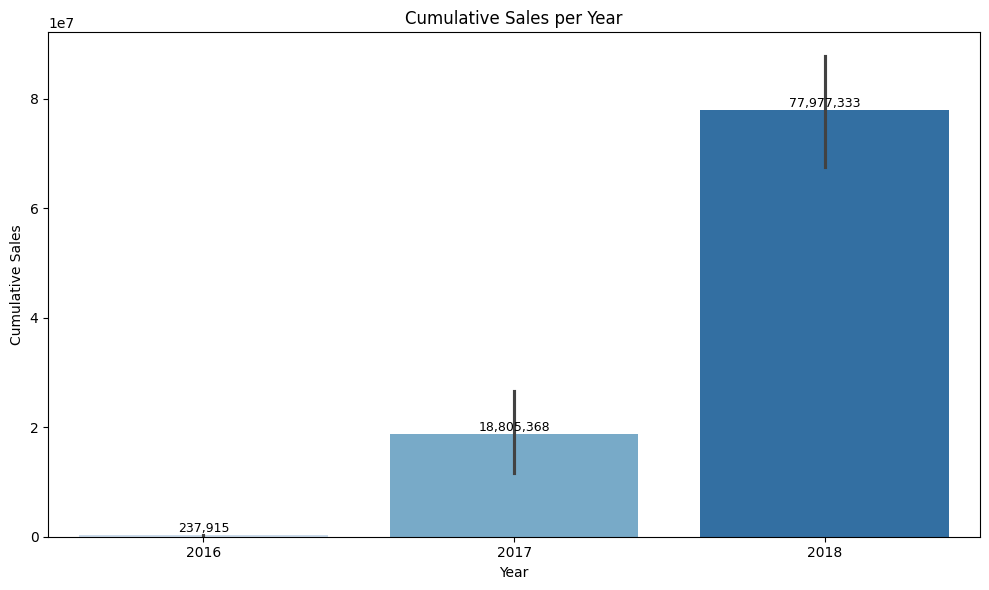

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# Your SQL query
query = '''
SELECT years, months, payments, 
       SUM(payments) OVER (ORDER BY years, months) AS cumulative_sales 
FROM (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        MONTH(orders.order_purchase_timestamp) AS months,
        SUM(payments.payment_value) AS payments 
    FROM orders
    JOIN payments ON orders.order_id = payments.order_id  
    GROUP BY years, months 
    ORDER BY years, months
) AS a
'''
cursor.execute(query)
data = cursor.fetchall()

# DataFrame
a = pd.DataFrame(data, columns=['Years', 'Months', 'Sales', 'Cumulative_sales'])

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Years', y='Cumulative_sales', data=a, palette='Blues')

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9)

plt.title('Cumulative Sales per Year')
plt.ylabel('Cumulative Sales')
plt.xlabel('Year')
plt.tight_layout()
plt.show()


# Calculate the year-over-year growth rate of total sales.

In [9]:
query='''select years,((payments-lag(payments) over(order by years ))/
lag(payments) over(order by years ))*100  percentage_growth from
(select year(orders.order_purchase_timestamp) as years,sum(payments.payment_value) as 
payments from orders
join payments on orders.order_id=payments.order_id  group by years order by years) as a;
'''
cursor.execute(query)
data=cursor.fetchall()
a=pd.DataFrame(data,columns=['Years','yoy % Growth'])
a

,Years,yoy % Growth
0,2016,NaN
1,2017,12112.703760
2,2018,20.000924


# Identify the top 3 customers who spend the most money in the each year.

In [20]:
query='''WITH customer_yearly_spend AS (
    SELECT 
        o.customer_id,
        YEAR(o.order_purchase_timestamp) AS order_year,
        SUM(p.payment_value) AS total_spent
    FROM orders o
    JOIN payments p ON o.order_id = p.order_id
    GROUP BY o.customer_id, YEAR(o.order_purchase_timestamp)
),
ranked_customers AS (
    SELECT 
        customer_id,
        order_year,
        total_spent,
        RANK() OVER (PARTITION BY order_year ORDER BY total_spent DESC) AS customer_rank
    FROM customer_yearly_spend
)
SELECT 
    order_year,
    customer_id,
    total_spent,customer_rank
FROM ranked_customers
WHERE customer_rank <= 3
ORDER BY order_year, customer_rank;

'''
cursor.execute(query)
data=cursor.fetchall()
a=pd.DataFrame(data,columns=['Years','Customer_id','Total_spent','Customer_rank'])
a

,Years,Customer_id,Total_spent,Customer_rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,8541.300293,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,8404.439941,2
2,2016,4a06381959b6670756de02e07b83815f,7366.680176,3
3,2017,1617b1357756262bfa56ab541c47bc16,81984.480469,1
4,2017,c6e2731c5b391845f6800c97401a43a9,41575.860352,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,40359.960938,3
6,2018,ec5b2ba62e574342386871631fafd3fc,43649.279297,1
7,2018,f48d464a0baaea338cb25f816991ab1f,41533.259766,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,28856.639648,3
